In [16]:
# importando librerías
import pandas as pd
!pip install sidetable -qU
!pip install -U pandas sidetable seaborn
import sidetable as stb
import numpy as np
from matplotlib import pyplot as plt 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats as st





[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
# Para las gráficas de plotly en github
import plotly.io as pio
pio.renderers.default = "svg"


# PASO 1. Abriendo el archivo de datos y estudiando la información general

In [17]:
#abriendo el archivo de datos
path= 'D:\\TripleTen\\Sprint 6_Proyecto_integrado\\Repositorio\\Data\\'
games = pd.read_csv(path + 'games.csv')

In [18]:
#estudiando al info gral.
games
games.info()
games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [19]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E
3469,Contra: Shattered Soldier,PS2,2002.0,Shooter,0.28,0.22,0.00,0.07,78.0,6.6,T
8431,25 to Life,XB,2006.0,Shooter,0.12,0.04,0.00,0.01,41.0,7.2,M
10337,DJ Max Fever,PSP,2009.0,Misc,0.09,0.00,0.00,0.01,77.0,6.5,T
9646,Monster Truck Madness,GBA,2003.0,Racing,0.09,0.03,0.00,0.00,75.0,tbd,E
3330,Yakuza: Dead Souls,PS3,2011.0,Shooter,0.09,0.06,0.42,0.03,64.0,7.4,M
10105,Cory in the House,DS,2007.0,Action,0.10,0.00,0.00,0.01,NaN,9.5,E
5347,Dynasty Warriors 5 Empires,PS2,2006.0,Action,0.11,0.09,0.12,0.03,62.0,9.1,T
3658,Soccer Tsuku 2002: J-League Pro Soccer Club o ...,PS2,2002.0,Sports,0.00,0.00,0.55,0.00,NaN,NaN,NaN
6052,Dragon Ball Heroes: Ultimate Mission,3DS,2013.0,Misc,0.00,0.00,0.29,0.00,NaN,NaN,NaN


In [20]:
# Revisando valores ausentes
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [21]:
# Revisando valores duplicados
games.duplicated().sum()

0

In [22]:
games.duplicated().sum()
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


# Conclusión

- El dataframe contiene 16.715 filas con 11 columnas.
- No existen valores duplicados.
- Existen valores ausentes en algunas columnas, hasta más del 51% en algún caso, por lo que no se pueden eliminar los datos, se deberán tratar esos valores ausentes.
- Los tipo de datos, en general, estan correctos, excepto en la columna "Year_of_release" que deberían ser enteros y en "User_score" que está como string y debería ser de tipo flotante.
- Lo ideal sería uniformizar el nombre de las columnas, todo en minúsculas o en mayúsculas (preferentemente minúsculas).

# PASO 2. Preparando los datos
- Reemplazando los nombres de las columnas (en minúsculas).

In [23]:
new_col_names = []

for old_name in games.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)
    
games.columns = new_col_names

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Conviertiendo los datos en los tipos necesarios.

In [25]:
#Viendo los tipos de datos
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [26]:
# year_of_release a int
# user_score a float

In [27]:
#Cambiando el tipo de datos de "year:of_release"
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [28]:
#Cambiando el tipo de datos para "user_score"
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan 
games['user_score'] = games['user_score'].astype('float')

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [30]:
games['user_score'].shape

(16715,)

- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

    - Se cambió la columna "year_of_release" de tipo float a tipo entero, para tener un mejor manejo, al tratarse de datos de años.
    - Se cambió la columna "user_score" del tipo string a flotante, pues al tratarse de calificaciones deberían ser variables cuantitativas.


- Si es necesario, elige la manera de tratar los valores ausentes:

In [31]:
#Valores ausentes
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [32]:
# primera columna con valores ausentes: "name"
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [33]:
games = games.dropna(subset=['name'])

In [34]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [35]:
# 2da columna con valores ausentes: "year_of_release"
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [36]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [37]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [38]:
games['rating'] = games['rating'].fillna(value='unknown')

C:\Users\Win10Pro\AppData\Local\Temp\ipykernel_23416\2365266905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['rating'] = games['rating'].fillna(value='unknown')


In [39]:
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

        - Se eliminó las dos filas que contenían valores ausentes en la columna "name". ambas filas coincidian con las que contenían valores ausentes en la columna "genre"
        - Para la columna "year_of_release", se deja los valores ausentes como están, si bien representan solo 1,61% de los datos, no se considera necesario eliminarlos o reemplazarlos por el momento.
        - Para "critic_score" y "user_score" no hay nada que se pueda hacer para rellenar los valores ausentes. No existe un criterio para rellenarlos con otro valor, por ejemplo la media o mediana, por lo que se considera inapropiado hacer algún rellenado. Por otro lado, estos datos representan un importante porcentaje de los datos totales, por lo que se considera que eliminarlos sería un error. De esta manera se los deja sin alteración.
        - Para "rating", lo que se hizo fue rellenar los valores ausentes con un valor por defecto, en este caso *unknown*. Esto por practicidad con el fin de facilitar el análisis, ya que está columna es de interés en el trabajo.

    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

        - Para "year_of_release" puede deberse a que algunos juegos son multiplataforma. Por lo que solo se indicó el año de lanzamiento en una plataforma y las otras se dejaron sin completar.
        - Para el caso de las criticas "user_score" y "critic_score" puede deberse a que los juegos muy antiguos no tienen una calificaión pues no se acostumbraba a calificar los juegos antes. Adicionalmente, los juegos muy recientes tampoco tienen una calificación porque al momento del corte de los datos todavía nos e habían realizado. Finalmente, la tercera opción, es que los juegos con pocas ventas no se les registra una calificacón, pues no son tomados en cuenta al por los usuarios.
        - Para "rating" puede que algunos valores estén ausentes porque la clasificación ESRB se utiliza solo en algunos países y se utiliza otro ssitema de calificaciones en otros. 

    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

        Para los casos de TBD, estos se los trató con la librería numpy y se los definió como valor especial para que represente un valor nulo

- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [40]:
sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
games['total_sales'] = 0 

for col in sales_cols:
    games['total_sales'] += games[col]   
games

C:\Users\Win10Pro\AppData\Local\Temp\ipykernel_23416\3953744036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['total_sales'] = 0
C:\Users\Win10Pro\AppData\Local\Temp\ipykernel_23416\3953744036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['total_sales'] += games[col]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


# Conclusión

- Se cambió el tipo de datos para dos columnas: "year_of_release" y "user_score"
- Se eliminó dos filas que contenían valores ausentes para la columna "name" y "genre"
- Los valores ausentes de "year_of_release" se mantuvo sin cambios, pues no se cree que afecte el análisis y rellenarlos con un valor arbitrario si podría cambiarlo.
- Para "critic_score" no se puede hacer nada con los valores ausentes, se deja son cambios.
- Para "user_score" tampoco hay nada que hacer para rellenar los valores ausentes. Se cambió los valores tbd por valores NaN para cambiar el tipo de datos.
- Se calculó una nueva columna con las ventas totales: "total_sales"

# Paso 3. Analiza los datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [41]:
games['year_of_release'].value_counts().sum()


16444

In [42]:
games['year_of_release'].value_counts().sort_index(ascending=False)

year_of_release
2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: count, dtype: Int64

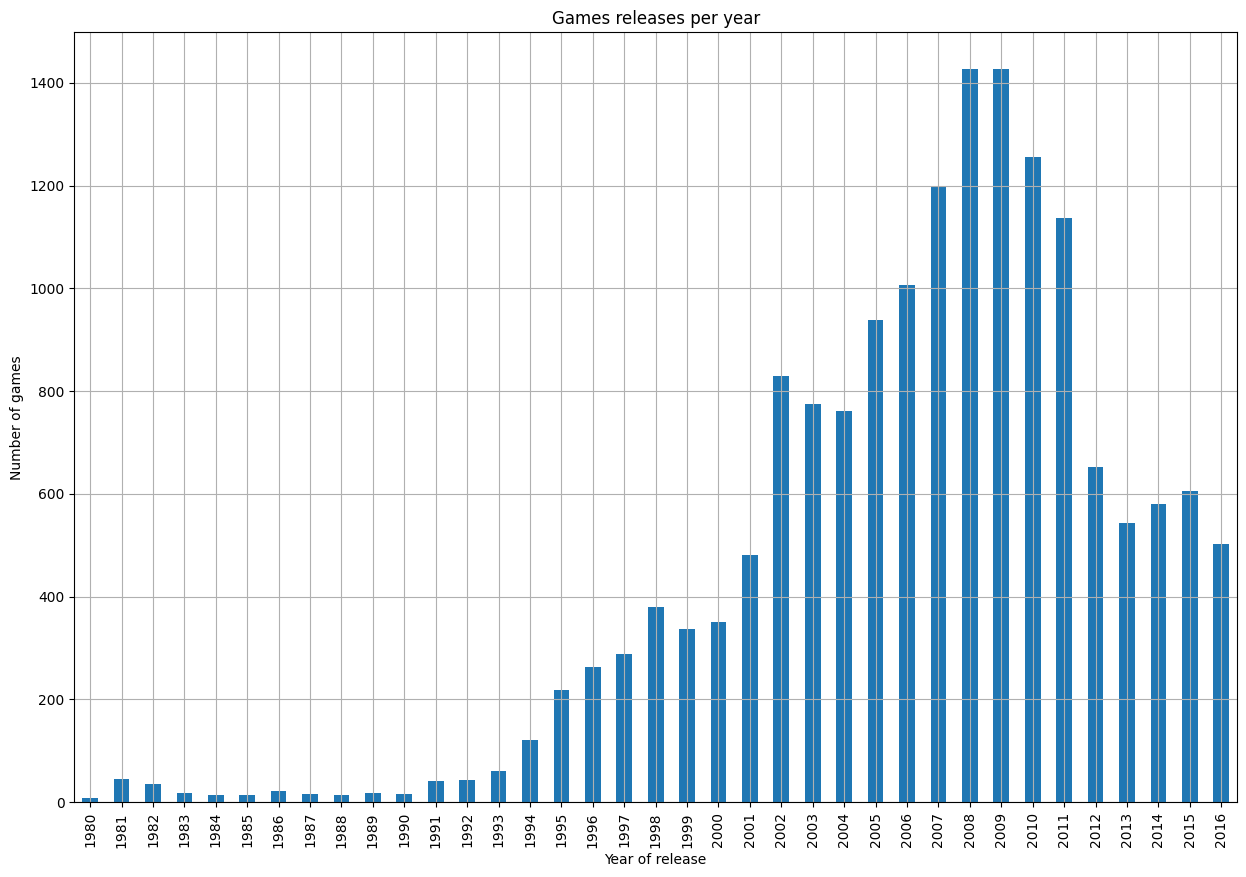

In [43]:
games['year_of_release'].value_counts().sort_index().plot(x= 'year_of_release', 
                                                          kind= 'bar', 
                                                          title= 'Games releases per year', 
                                                          xlabel= 'Year of release', 
                                                          ylabel= 'Number of games',
                                                          grid=True,
                                                          figsize=[15,10])
plt.show()

**Gráfico 1.** Muestra cuantos juegos fueron lanzados por año. Podemos observar que desde 1980, el lanzamiento de juegos, se mantiene estable y empieza a tener un crecimiento bastante acelerado a mediados de los años 90. Alcanzando un pico en los años 2008 y 2009. Sin embargo, a partír del año 2010, el lanzamiento de juegos disminuye y se estanca a partír del año 2011.

Podemos observar que no todos los datos de cada perido son significativos. Antes de 1995 los datos no son tan significativos debido al bajo nivel de lanzamiento de juegos.

* Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

    - Observa cómo varían las ventas de una plataforma a otra.

In [44]:
platform_sales= pd.pivot_table(
    games, index= 'year_of_release',
    columns= 'platform',
    values= 'total_sales',
    aggfunc= 'sum')

In [45]:
platform_sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
platform_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1980 to 2016
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2600    10 non-null     float64
 1   3DO     2 non-null      float64
 2   3DS     6 non-null      float64
 3   DC      7 non-null      float64
 4   DS      11 non-null     float64
 5   GB      13 non-null     float64
 6   GBA     8 non-null      float64
 7   GC      7 non-null      float64
 8   GEN     5 non-null      float64
 9   GG      1 non-null      float64
 10  N64     7 non-null      float64
 11  NES     12 non-null     float64
 12  NG      4 non-null      float64
 13  PC      26 non-null     float64
 14  PCFX    1 non-null      float64
 15  PS      10 non-null     float64
 16  PS2     12 non-null     float64
 17  PS3     11 non-null     float64
 18  PS4     4 non-null      float64
 19  PSP     12 non-null     float64
 20  PSV     6 non-null      float64
 21  SAT     6 non-null      float64
 22  SCD 

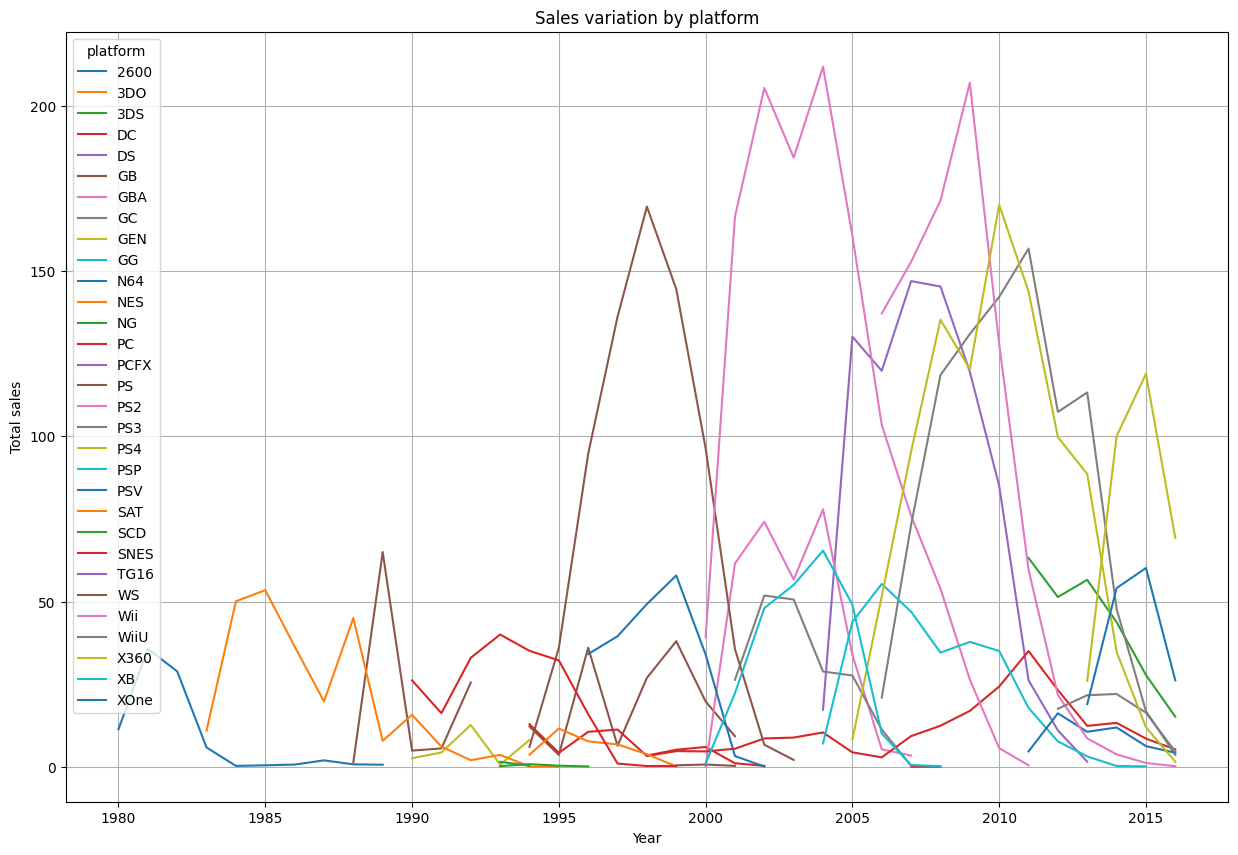

In [47]:
platform_sales.plot(title= 'Sales variation by platform',  
                    xlabel= 'Year', 
                    ylabel= 'Total sales',
                    grid=True,
                    figsize=[15,10]
                   )
plt.show()

**Gráfico 2.** Muestra las ganancias generadas por cada plataforma para cada año de vida de la misma.

    - Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

In [48]:
# Plataformas con mayores ventas totales
platform_sales.sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64

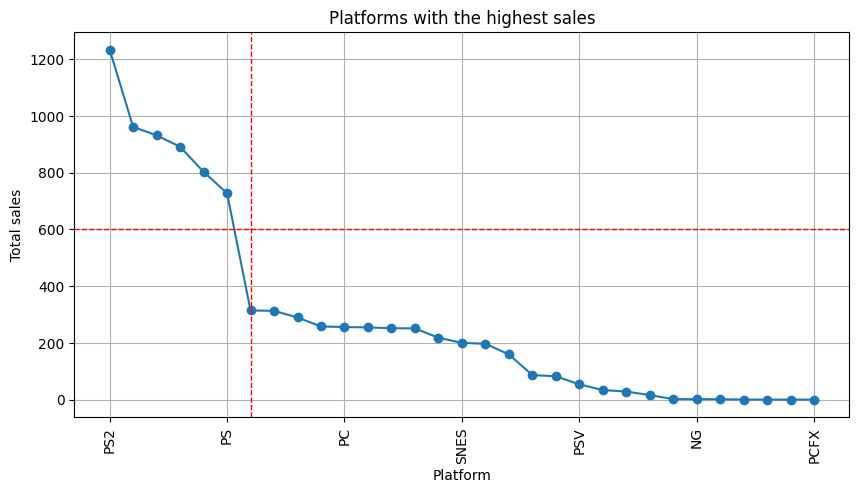

In [49]:
platform_sales.sum().sort_values(ascending=False).plot(title= 'Platforms with the highest sales',  
                                                        style='o-',
                                                        xlabel= 'Platform', 
                                                        ylabel= 'Total sales',
                                                        grid=True,
                                                        figsize=[10,5],
                                                        rot=90,
                                                        )
plt.axhline(600, color = "red", linewidth = 1, linestyle = "dashed");
plt.axvline(6, color = "red", linewidth = 1, linestyle = "dashed");
plt.show()

**Gráfico 3.**

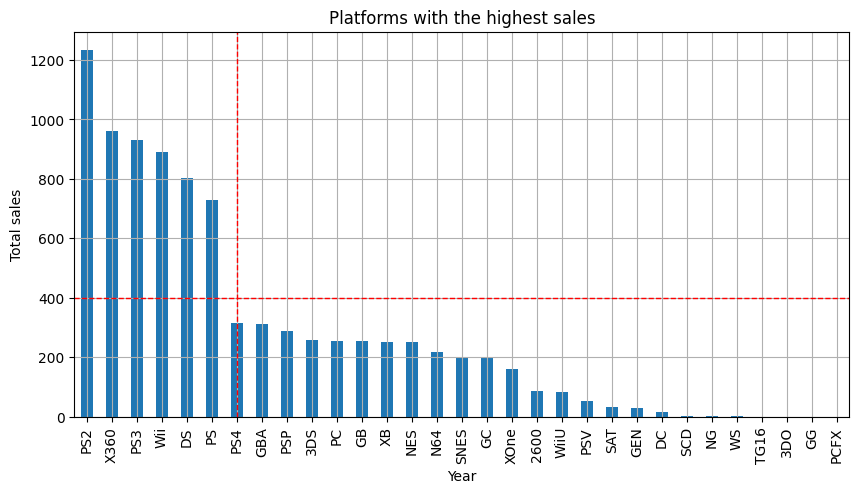

In [50]:
platform_sales.sum().sort_values(ascending=False).plot(title= 'Platforms with the highest sales',  
                                                        kind= 'bar',
                                                        xlabel= 'Year', 
                                                        ylabel= 'Total sales',
                                                        grid=True,
                                                        figsize=[10,5],
                                                        )
plt.axhline(400, color = "red", linewidth = 1, linestyle = "dashed");
plt.axvline(6, color = "red", linewidth = 1, linestyle = "dashed");
plt.show()

**Gráfico 4.**

In [51]:
# Aplicando un *puntaje Z* para determinar cuales fueron las plataformas mas y menos dominantes durante todo el periodo
sales= games[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
sales['z_score']=(sales['total_sales']-sales['total_sales'].mean())/sales['total_sales'].std()
sales['color']= ['red' if x<0 else 'green' for x in sales['z_score']]
sales

,platform,total_sales,z_score,color
0,PCFX,0.03,-0.825614,red
1,GG,0.04,-0.825586,red
2,3DO,0.10,-0.825413,red
3,TG16,0.16,-0.825241,red
4,WS,1.42,-0.821623,red
5,NG,1.44,-0.821565,red
6,SCD,1.86,-0.820359,red
7,DC,15.95,-0.779896,red
8,GEN,28.35,-0.744287,red
9,SAT,33.59,-0.729239,red


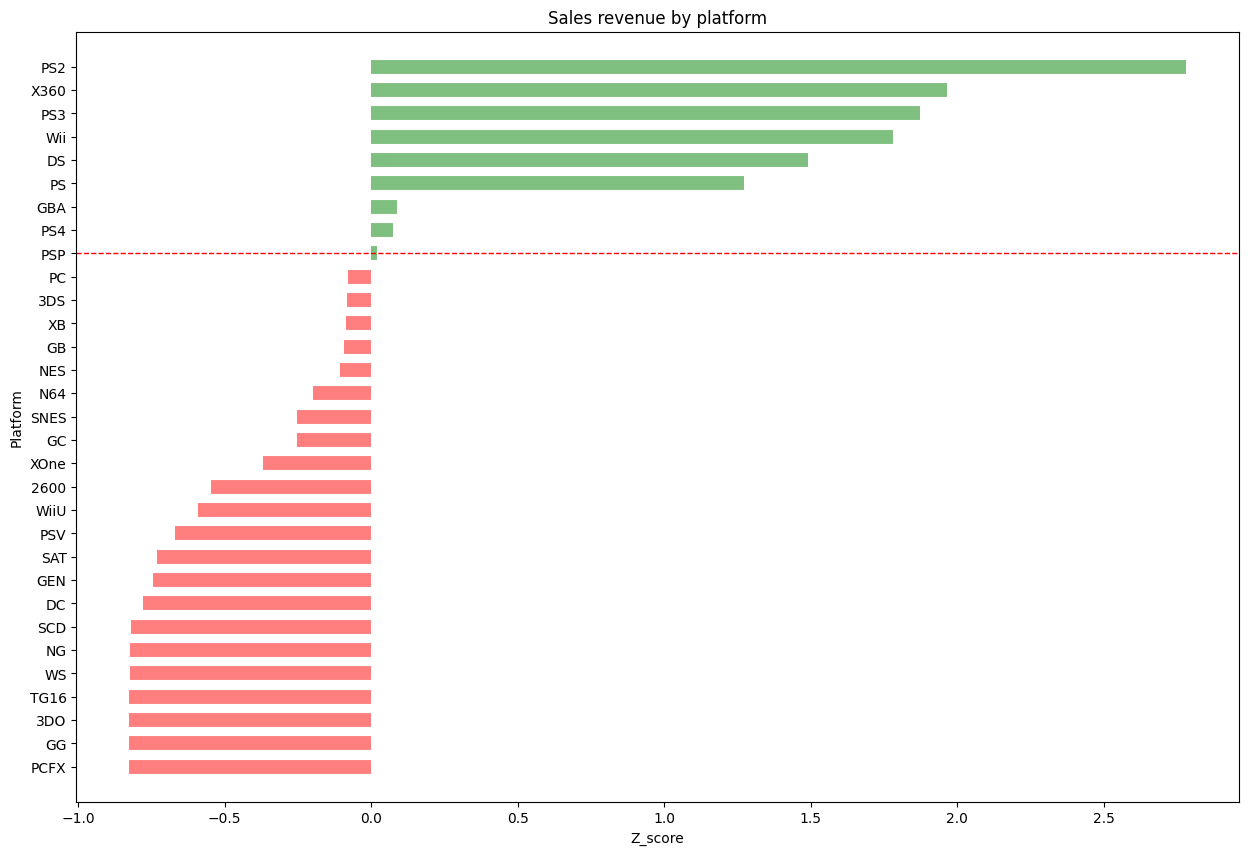

In [52]:
plt.figure(figsize=(15,10))
plt.hlines(y=sales.platform,
          xmax=sales.z_score,
          xmin=0,
          color=sales.color,
          linewidth=10,
          alpha=0.5
          )

plt.ylabel('Platform')
plt.xlabel('Z_score')
plt.title('Sales revenue by platform')
plt.axhline('PSP', color = "red", linewidth = 1, linestyle = "dashed");

**Gráfico 5.** Muestra en verde cuales plataformas fueron las más rentables y en rojo las menos rentables. El puntaje z calculado muestra que tan lejos está el ingreso de cada plataforma de la media de los ingresos totales, esta herramienta muestra a cuantas desviaciones estandar de su media se encuentran las ventas de cada plataforma. Asi, en este gráfico podemos observar que se cumle la regla de pareto, donde el 80% de las ventas totales se explican por el 20% de las plataformas.

 - Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Esta información la podemos ver en el ***Gráfico 2***. Podemos ver que las plataformas más populares tienen un periodo de vida de entre 5 a 10 años aproximadamente.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [53]:
relevant_data=games[games['year_of_release'] >= 2012]

In [54]:
plot_data = relevant_data.groupby(['year_of_release', 'platform']).agg({'total_sales':'sum'}).reset_index()

fig= px.line(plot_data, x='year_of_release', y='total_sales', color='platform', title='New sales variation by platform')
fig.show()

**Gráfico 6.** Muestra el ingreso generado por plataforma desde el periodo 2012 al 2016. Se puede observar que para el año 2016 el ingreso generado por ventas de todas las plataformas está disminuyendo.Adicionalmente, muestra los datos relevantes tomando un periodo de tiempo desde el año 2012. Se considera que datos más antiguos no serían muy utiles al momento de hacer predicciones para el año 2017

In [55]:
plot_data

,year_of_release,platform,total_sales
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69
5,2012,PSV,16.19
6,2012,Wii,21.71
7,2012,WiiU,17.56
8,2012,X360,99.74
9,2013,3DS,56.57


- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Como ya se ha mencionado, se trabajará con datos a partír del 2012, pues datos más antiguos no serían relevantes para hacer predicciones.

A partír de este punto, según indicación del instructivo se trabajará unicamente con los valores seleccionados, correspondientes al periodo 2012 a 2016 almacenados en el DataFrame ***relevant_data***

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

    - Para el año 2016, las plataformas líderes en ventas son:
        - la PS4 en primer lugar, 
        - la XOne en segundo lugar, 
        - le sigue el Nintendo 3DS 
        y una menor menor escala están la PC, la PSV y la WiiU. Las demás pltaformas ya no registran ingresos significativos en este periodo (Ver *Gráfico 6*).
    - En líneas generales a lo largo del tiempo, en todo el periodo de estudio, las plataformas más rentables han sido la PS2, X360, PS3, Wii, DS y PS (Ver *Gráfico 5*).

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [56]:
fig2= px.box(relevant_data, 
             x='platform', 
             y='total_sales', 
             title='Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma',
             width=900, 
             height=900
             )
fig2.show()

**Gráfico 7**. Muestra un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. Podemos observar que casi todas las plataformas contienen valores atípicos importantes. Las diferencias en las ventas si son significativas por estos valores atípicos correspondientes a juegos que han tenido diferente nivel de éxito en cada plataforma. 
Las ventas promedio en las plataformas se ven afectadas por estos valores atípicos, mientras que la mediana es similar en casi todas las plataformas.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [57]:
# Se considerará la plataforma PS4 para esta sección.
ps4 = relevant_data[relevant_data['platform'] == 'PS4']
ps4 = ps4.loc[:, ['critic_score', 'user_score', 'total_sales']]
ps4

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66
...,...,...,...
16500,69.0,7.5,0.01
16503,NaN,NaN,0.01
16526,61.0,7.9,0.01
16530,51.0,5.5,0.01


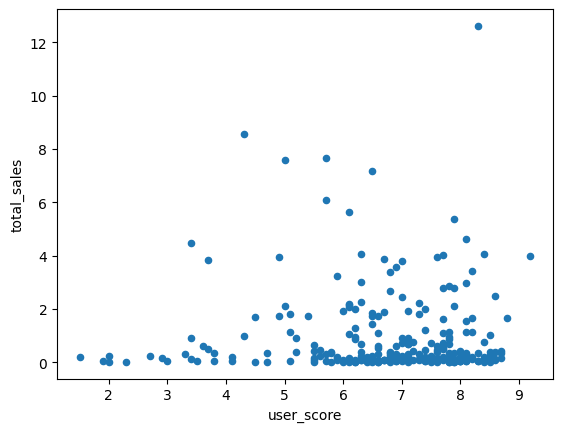

In [58]:
# Para la PS4 y las reseñas de los usuarios:   
ps4.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

**Gráfico 8**. Muestra el diagrama de dispersión entre las ventas de la plataforma PS4 y la crítica de los usuarios. A primera vista no existe una correlación entre las variables. Se debe calcular el Coeficiente de correlación.

In [59]:
print('El coeficiente de correlación entre las ventas de la plataforma PS4 y la crítica de los usuarios es:')
ps4['total_sales'].corr(ps4['user_score'])

El coeficiente de correlación entre las ventas de la plataforma PS4 y la crítica de los usuarios es:


-0.03195711020455643

El coeficiente de correlación es ligeramente negativo pero cercano a cero, por lo que se confirma que realmente no exite una relación positiva ni negativa entre estas dos variables.

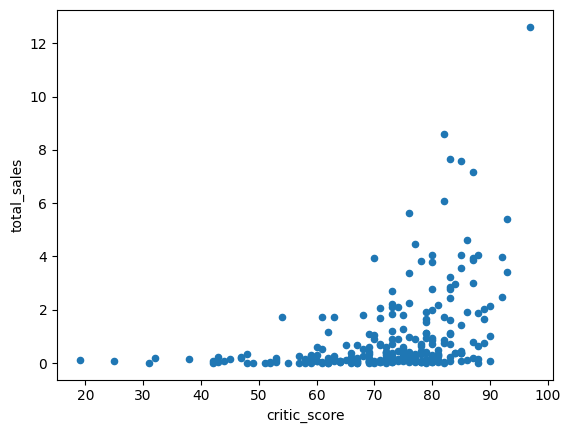

In [60]:
# Para la PS4 y las reseñas de los profesionales:   
ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

**Gráfico 9**. Muestra el diagrama de dispersión entre las ventas de la plataforma PS4 y la crítica de los profesionales. A primera vista se puede apreciar una ligera relación positiva entre estas dos variables. Se debe calcular el Coeficiente de correlación.

In [61]:
print('El coeficiente de correlación entre las ventas de la plataforma PS4 y la crítica de los profesionales es:')
ps4['total_sales'].corr(ps4['critic_score'])

El coeficiente de correlación entre las ventas de la plataforma PS4 y la crítica de los profesionales es:


0.4065679020617816

El coeficiente de correlación es ligeramente mayor a cero, por lo que se confirma una débil relación positiva entre las dos variables

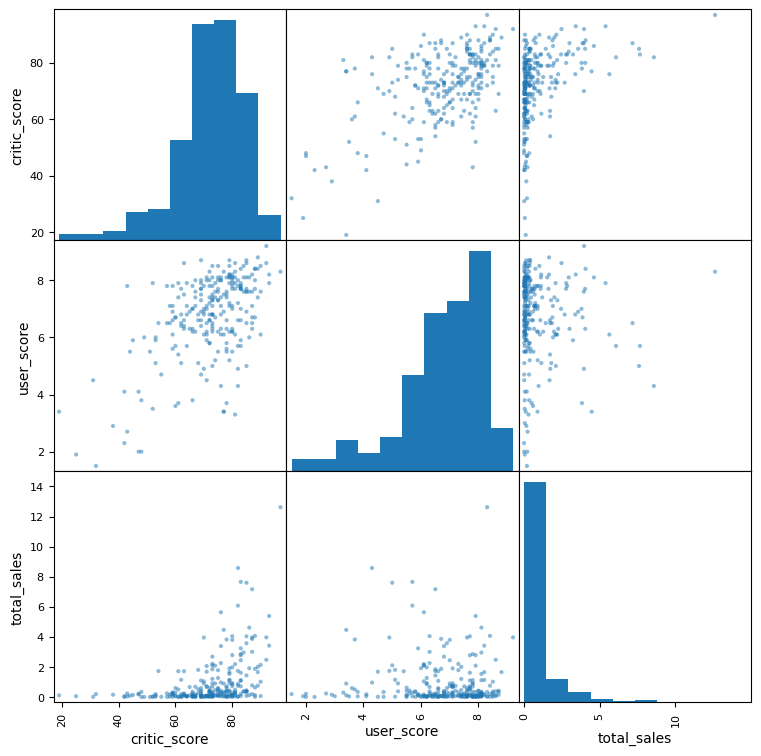

In [62]:
# Complementando y confirmando los datos con matrices de dispersión y correlación
pd.plotting.scatter_matrix(ps4, figsize=(9,9))
plt.show()

**Gráfico 10**. Muestra la matriz de dispersión de las columnas: ventas totales, crítica de los usuarios y crítica de proefsionales

In [63]:
# Matriz de correlación
ps4.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


# Conclusiones
    - Para realizar el análisis se escogió la plataforma PS4.
    - Se pudo observar que las reseñas de los usuarios no tienen un importante efecto en las ventas de esta plataforma.
    - Las reseñas de los profesionales sí tienen una relación positiva con las ventas. La relación es positiva, una buena calificación de los profesionales tendrán un impacto positivo en las ventas de la plataforma.


- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [64]:
mult_plat= relevant_data.groupby(['name', 'platform'])['total_sales'].sum()
mult_plat

name                         platform
 Beyblade Burst              3DS         0.03
 Fire Emblem Fates           3DS         1.67
 Frozen: Olaf's Quest        3DS         0.59
                             DS          0.51
 Haikyu!! Cross Team Match!  3DS         0.04
                                         ... 
[Prototype 2]                PC          0.11
                             PS3         0.74
                             X360        0.79
htoL#NiQ: The Firefly Diary  PSV         0.01
inFAMOUS: Second Son         PS4         2.79
Name: total_sales, Length: 2885, dtype: float64

In [65]:
mult_plat= relevant_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

mult_plat

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
4,Haikyu!! Cross Team Match!,3DS,0.04
...,...,...,...
2880,[Prototype 2],PC,0.11
2881,[Prototype 2],PS3,0.74
2882,[Prototype 2],X360,0.79
2883,htoL#NiQ: The Firefly Diary,PSV,0.01


mult_plat está correcto como agrupación, sin enbargo no nos resulta muy útil para el análisis que se quiere hacer porque también  contiene juegos que están presentes en solo una plataforma, por lo que no tiene sentido incluirlos en esta seccion en la que se quiere analizar el ingreso de los mismos juegos en diferentes plataformas.
Por lo que se debe hacer un filtrado para que la lista contenga juegos que están presentes en al menos dos plataformas.

In [66]:
# Filtrando para que la lista solo incluya juegos presentes en dos o más plataformas.
mult_plat2= relevant_data.groupby('name')['platform'].nunique().reset_index().sort_values(by='platform', ascending=False)
mult_plat2= mult_plat2[mult_plat2['platform'] > 1] 
mult_plat2

,name,platform
760,LEGO Marvel Super Heroes,9
433,FIFA 14,9
773,Lego Batman 3: Beyond Gotham,8
438,FIFA Soccer 13,8
758,LEGO Jurassic World,8
...,...,...
296,Devil May Cry HD Collection,2
1484,Tiger Woods PGA Tour 13,2
300,DiRT Showdown,2
1237,Shin Hayarigami 2,2


In [67]:
mult_plat_merged= mult_plat2.merge(mult_plat, on='name')
mult_plat_merged

,name,platform_x,platform_y,total_sales
0,LEGO Marvel Super Heroes,9,3DS,0.89
1,LEGO Marvel Super Heroes,9,DS,0.38
2,LEGO Marvel Super Heroes,9,PC,0.17
3,LEGO Marvel Super Heroes,9,PS3,1.83
4,LEGO Marvel Super Heroes,9,PS4,1.62
...,...,...,...,...
1805,DiRT Showdown,2,X360,0.23
1806,Shin Hayarigami 2,2,PS4,0.01
1807,Shin Hayarigami 2,2,PSV,0.02
1808,Project Setsuna,2,PS4,0.06


In [68]:
mult_plat_merged.rename(columns= {'platform_x': 'n_platforms', 'platform_y': 'platform'}, inplace=True)
mult_plat_merged

,name,n_platforms,platform,total_sales
0,LEGO Marvel Super Heroes,9,3DS,0.89
1,LEGO Marvel Super Heroes,9,DS,0.38
2,LEGO Marvel Super Heroes,9,PC,0.17
3,LEGO Marvel Super Heroes,9,PS3,1.83
4,LEGO Marvel Super Heroes,9,PS4,1.62
...,...,...,...,...
1805,DiRT Showdown,2,X360,0.23
1806,Shin Hayarigami 2,2,PS4,0.01
1807,Shin Hayarigami 2,2,PSV,0.02
1808,Project Setsuna,2,PS4,0.06


In [69]:
figu = px.bar(mult_plat_merged, x="platform", y="total_sales", color='name')
figu.update_layout(legend=dict(
    yanchor="bottom",
    y=1,
    xanchor="left",
    x=0.01
))
figu.show()

**Gráfico 11**. Compara las ventas (en millones de dólares) de los juegos en difrentes plataformas. Para hacer buen uso de la información, seleccionar el juego deseado (haciendo doble click en la *leyenda* del gráfico) y se podrá observar su nivel de ventas en las diferentes plataformas.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [70]:
relevant_data['genre'].value_counts()

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

In [71]:
dist_gen= relevant_data.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)
dist_gen

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

In [72]:
dist_gen= relevant_data.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
dist_gen

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


In [73]:
figu2= px.bar(dist_gen.sort_values(by='total_sales', ascending=True), 
             x='total_sales', 
             y='genre', 
             title='Sales distribution by genre',
             color='total_sales',
             orientation='h'
             )
figu2.show()


**Gráfico 12**. Muestra la distribución de las ventas por género. Observamos que los generos con mayores ventas son:
- Acción,
- Shooter y
- Role-Playing.
    
Mientras que los géneros con menores ventas son:
    
- Puzzle,
- Strategy,
- Adventure.
        


¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

En este punto no se puede generalizar acerca de los géneros con ventas altas y bajas porque no se está considerando la media de las ventas, se está considerando la suma de las ventas de cada género. Entonces, un género puedo haber generado, con un solo juego, las mismas ventas que otro con varios. Para este analisis necesitamos estudiar la media por género. En este caso, el género con mayores ventas totales que es Action, también es el con mayor cantidad de juegos.

In [74]:
dist_gen_mean= relevant_data.groupby(['genre'])['total_sales'].mean().reset_index().sort_values(by='total_sales', ascending=False)
dist_gen_mean

,genre,total_sales
8,Shooter,1.296723
4,Platform,0.717647
10,Sports,0.675634
7,Role-Playing,0.521081
6,Racing,0.465217
3,Misc,0.442917
9,Simulation,0.439000
0,Action,0.427856
2,Fighting,0.408165
11,Strategy,0.187887


In [75]:
figu3= px.bar(dist_gen_mean.sort_values(by='total_sales', ascending=True), 
             x='total_sales', 
             y='genre', 
             title='Distribution of average sales by gender',
             color='total_sales',
             orientation='h'
             )
figu3.show()


**Gráfico 13**. Muestra la distribución del promedio de las ventas por género. Observamos que el panorama cambia, aquí los géneros con mayor promedio de ventas son:
- Shooter, 
- Platform y 
- Sports.

Mientras que, los géneros con menor promedio de ventas son:

- Adventure
- Puzzle y 
- Strategy

Esta distribución es más correcta para hacer una generalización y podemos concluír que el género que mas vende, en promedio, es Shooter. Mientras que, el género con menores ventas, en promedio, es Adventure. El género Action, se desplaza hasta la mitad masomenos poniedno en evidencia que si bien es el que más ventas totales tiene es porque tiene la mayor cantidad de juegos, pero en promedio, cada juego de este género vende mucho menos que los demás.

# Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. 
- Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [76]:
#cuota de mdo= qué porcentaje de las ventas se dieron en una región o en otra
#1 calcular la 5 plataformas principales
#2 como es que cada una de las plataformas vende en cada region 
#3 hacer lo mismo por gener
# boxplot por región por cada clasificacion.

- Las cinco plataformas principales. 

In [77]:
# Cinco plataformas principales en na
top5_na= relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5].reset_index()
top5_na

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


In [78]:
# Cinco plataformas principales en eu
top5_eu= relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5].reset_index()
top5_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


In [79]:
# Cinco plataformas principales en jp
top5_jp= relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5].reset_index()
top5_jp

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


In [80]:
# Cinco plataformas principales en other
top5_other= relevant_data.groupby('platform')['other_sales'].sum().sort_values(ascending=False)[:5].reset_index()
top5_other

,platform,other_sales
0,PS4,48.35
1,PS3,43.26
2,X360,20.40
3,XOne,14.27
4,3DS,8.87


In [81]:
#Agrupando las cinco plataformas principales en un mismo DataFrame
top5= top5_na.merge(top5_eu, on='platform', how='outer')
top5= top5.merge(top5_jp, on='platform', how='outer')
top5= top5.merge(top5_other, on='platform', how='outer')
top5['total_sales']= top5[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
top5

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,3DS,55.31,42.64,87.79,8.87,194.61
1,PS3,103.38,106.86,35.29,43.26,288.79
2,PS4,108.74,141.09,15.96,48.35,314.14
3,PSV,NaN,NaN,21.04,NaN,21.04
4,WiiU,NaN,NaN,13.01,NaN,13.01
5,X360,140.05,74.52,NaN,20.40,234.97
6,XOne,93.12,51.59,NaN,14.27,158.98


In [82]:
# Agrupando las plataformas por regiones
regions= top5.set_index('platform').T.reset_index().drop(index=4)
regions

platform,index,3DS,PS3,PS4,PSV,WiiU,X360,XOne
0,na_sales,55.31,103.38,108.74,NaN,NaN,140.05,93.12
1,eu_sales,42.64,106.86,141.09,NaN,NaN,74.52,51.59
2,jp_sales,87.79,35.29,15.96,21.04,13.01,NaN,NaN
3,other_sales,8.87,43.26,48.35,NaN,NaN,20.40,14.27


In [83]:
figura = px.bar(top5, x="platform", y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                barmode='group', text='variable',
                title='Regiones con más ventas por plataforma'
                )
figura

**Gráfico 14.** Muestra las ventas de las plataformas principales en cada región. En qué región vende mas o menos cada plataforma

In [84]:
figura2 = px.bar(regions, x="index", y=regions.columns[1:], barmode='group', 
                 text='variable', title='Plataformas principales por región', 
                 labels={'index': 'Region', 'value': 'ventas'}
                 )
figura2

**Gráfico 15.** Muestra las plataformas principales en cada región. Que plataformas venden más o menos en cada región.
Podemos observar que el nivel de ventas en NA y en EU es considerablemente mayor a las otras regiones.

- Describe las variaciones en sus cuotas de mercado de una región a otra.

In [85]:
#cambiando la tabla top5 a porcentajes para encontrar las cuotas de mercado.
market_share= top5_na.merge(top5_eu, on='platform', how='outer')
market_share= market_share.merge(top5_jp, on='platform', how='outer')
market_share= market_share.merge(top5_other, on='platform', how='outer')
market_share['total_sales']= top5[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
market_share

for col in sales_cols:
    market_share[col] = market_share[col] / market_share['total_sales']
    
market_share



,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,3DS,0.284209,0.219105,0.451107,0.045578,194.61
1,PS3,0.357976,0.370027,0.122200,0.149797,288.79
2,PS4,0.346151,0.449131,0.050805,0.153912,314.14
3,PSV,NaN,NaN,1.000000,NaN,21.04
4,WiiU,NaN,NaN,1.000000,NaN,13.01
5,X360,0.596034,0.317147,NaN,0.086820,234.97
6,XOne,0.585734,0.324506,NaN,0.089760,158.98


In [86]:
specs=[[{'type':'domain'}, {'type':'domain'}], 
      [{'type':'domain'}, {'type':'domain'}], 
      [{'type':'domain'}, {'type':'domain'}], 
      [{'type':'domain'}, {'type':'domain'}]]
figa = make_subplots(rows=4, cols=2, specs=specs)
                           

figa.add_trace(go.Pie(labels=regions['index'], values=regions["X360"],  title="X360"), 1, 1)
figa.add_trace(go.Pie(labels=regions['index'], values=regions["PS4"], title="PS4"), 1, 2)
figa.add_trace(go.Pie(labels=regions['index'], values=regions["PS3"], title="PS3"), 2, 1)
figa.add_trace(go.Pie(labels=regions['index'], values=regions["XOne"], title="XOne"), 2, 2)
figa.add_trace(go.Pie(labels=regions['index'], values=regions["3DS"], title="3DS"), 3, 1)
figa.add_trace(go.Pie(labels=regions['index'], values=regions["PSV"], title="PSV"), 3, 2)
figa.add_trace(go.Pie(labels=regions['index'], values=regions["WiiU"], title="WiiU"), 4, 1)

figa.update_layout(title_text='Cuotas de mercado de las plataformas en cada región')

figa.show()

In [87]:
regions

platform,index,3DS,PS3,PS4,PSV,WiiU,X360,XOne
0,na_sales,55.31,103.38,108.74,NaN,NaN,140.05,93.12
1,eu_sales,42.64,106.86,141.09,NaN,NaN,74.52,51.59
2,jp_sales,87.79,35.29,15.96,21.04,13.01,NaN,NaN
3,other_sales,8.87,43.26,48.35,NaN,NaN,20.40,14.27


**Gráfico 16.** Muestra las cuotas de mercado de las plataformas de videojuegas en cada región de análisis.

In [88]:
figurad = px.bar(market_share, x="platform", y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], text='variable',
                 title='Variaciones en las cuotas de mercado de las plataformas en cada región', 
                 labels={'value': 'Cuota de mercado'})
                
                
figurad

**Gráfico 17.** Muestra la variación que tienen las cuotas de mercado de las plataformas de videojuegos de una región a otra.

- Para cada región (NA, UE, JP) determina: Los cinco géneros principales. Explica la diferencia.

In [89]:
# Cinco géneros principales en na
gen5_na= relevant_data.groupby('genre')['na_sales'].mean().sort_values(ascending=False)[:5].reset_index()
gen5_na

,genre,na_sales
0,Shooter,0.616043
1,Sports,0.304216
2,Platform,0.298588
3,Misc,0.198906
4,Fighting,0.181560


In [90]:
# Cinco géneros principales en eu
gen5_eu= relevant_data.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)[:5].reset_index()
gen5_eu

,genre,eu_sales
0,Shooter,0.482851
1,Sports,0.257799
2,Platform,0.251882
3,Racing,0.237304
4,Simulation,0.181875


In [91]:
# Cinco géneros principales en jp
gen5_jp= relevant_data.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)[:5].reset_index()
gen5_jp

,genre,jp_sales
0,Role-Playing,0.176865
1,Simulation,0.130125
2,Platform,0.101529
3,Fighting,0.086606
4,Puzzle,0.076429


In [92]:
# Cinco géneros principales en other
gen5_other= relevant_data.groupby('genre')['other_sales'].mean().sort_values(ascending=False)[:5].reset_index()
gen5_other

,genre,other_sales
0,Shooter,0.158553
1,Sports,0.083731
2,Platform,0.065647
3,Racing,0.056435
4,Action,0.049602


In [93]:
#Agrupando los cinco géneros principales en un mismo DataFrame
gen5= gen5_na.merge(gen5_eu, on='genre', how='outer')
gen5= gen5.merge(gen5_jp, on='genre', how='outer')
gen5= gen5.merge(gen5_other, on='genre', how='outer')

gen5

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,NaN,NaN,NaN,0.049602
1,Fighting,0.181560,NaN,0.086606,NaN
2,Misc,0.198906,NaN,NaN,NaN
3,Platform,0.298588,0.251882,0.101529,0.065647
4,Puzzle,NaN,NaN,0.076429,NaN
5,Racing,NaN,0.237304,NaN,0.056435
6,Role-Playing,NaN,NaN,0.176865,NaN
7,Shooter,0.616043,0.482851,NaN,0.158553
8,Simulation,NaN,0.181875,0.130125,NaN
9,Sports,0.304216,0.257799,NaN,0.083731


In [94]:
# Agrupando los géneros por regiones
gens= gen5.set_index('genre').T.reset_index()
gens

genre,index,Action,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
0,na_sales,NaN,0.181560,0.198906,0.298588,NaN,NaN,NaN,0.616043,NaN,0.304216
1,eu_sales,NaN,NaN,NaN,0.251882,NaN,0.237304,NaN,0.482851,0.181875,0.257799
2,jp_sales,NaN,0.086606,NaN,0.101529,0.076429,NaN,0.176865,NaN,0.130125,NaN
3,other_sales,0.049602,NaN,NaN,0.065647,NaN,0.056435,NaN,0.158553,NaN,0.083731


In [95]:
#graficando los cinco géneros principales para cada región
figurar = px.bar(gens, x="index", y=gens.columns[1:], barmode='group', 
                 text='variable', title='Géneros principales por región', 
                 labels={'index': 'Región', 'value': 'Promedio de ventas'}
                 )
figurar

**Gráfico 18.** Muestra los géneros principales en cada región. Qué géneros venden más o menos en cada región.
El gráfico muestra que los gustos en cuanto a los géneros es similar en todas las regiones excepto en Japón, que tienen otras características en cuanto a sus géneros preferidos.
Podemos observar que el nivel de ventas promedio en NA y en EU es considerablemente mayor a las otras regiones.

- Para cada región (NA, UE, JP) determina: Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

            - Calificación ESRB
                - M: Maduro +17
                - E: Todos
                - E10+: Todos los mayores de 10 años
                - T: Adolescentes

In [96]:
# Efecto de las clasificaciones de ESRB en na
rating_na= relevant_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[:5].reset_index()
rating_na

,rating,na_sales
0,M,231.57
1,E,114.37
2,unknown,103.31
3,E10+,75.70
4,T,66.02


In [97]:
# Efecto de las clasificaciones de ESRB en eu
rating_eu= relevant_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[:5].reset_index()
rating_eu

,rating,eu_sales
0,M,193.96
1,E,113.03
2,unknown,91.50
3,E10+,55.37
4,T,52.96


In [98]:
# Efecto de las clasificaciones de ESRB en jp
rating_jp= relevant_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[:5].reset_index()
rating_jp

,rating,jp_sales
0,unknown,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


In [99]:
# Efecto de las clasificaciones de ESRB en other
rating_other= relevant_data.groupby('rating')['other_sales'].sum().sort_values(ascending=False)[:5].reset_index()
rating_other

,rating,other_sales
0,M,63.38
1,E,31.44
2,unknown,27.17
3,T,17.94
4,E10+,16.23


In [100]:
#Agrupando las calificaciones principales en un mismo DataFrame
rat= rating_na.merge(rating_eu, on='rating', how='outer')
rat= rat.merge(rating_jp, on='rating', how='outer')
rat= rat.merge(rating_other, on='rating', how='outer')

rat

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,114.37,113.03,28.33,31.44
1,E10+,75.70,55.37,8.19,16.23
2,M,231.57,193.96,21.20,63.38
3,T,66.02,52.96,26.02,17.94
4,unknown,103.31,91.50,108.84,27.17


In [101]:
# Agrupando los ratings por regiones
rats= rat.set_index('rating').T.reset_index()
rats

rating,index,E,E10+,M,T,unknown
0,na_sales,114.37,75.70,231.57,66.02,103.31
1,eu_sales,113.03,55.37,193.96,52.96,91.50
2,jp_sales,28.33,8.19,21.20,26.02,108.84
3,other_sales,31.44,16.23,63.38,17.94,27.17


In [102]:
#graficando los ratings principales para cada región
figurat = px.bar(rats, x="index", y=rats.columns[1:], barmode='group', 
                 text='variable', title='Calificaciones principales por región', 
                 labels={'index': 'Región', 'value': 'Ventas'}
                 )
figurat

**Gráfico 19.** Muestra el efecto de las califiaciones ESRB en las ventas en regiones individuales. 
Podemos observar que la calificación con mas ventas es la M (*Maduro +17*), seguido por la calificación E (*Todos*) y la califiación con menos ventas es la T (*Adolescentes*) a excepción de Japón, donde la calificación con mas ventas es desconocida (*No se tiene datos o no están calificados*) y la que menos vende es la calificación E10+ (*Todos los mayores de 10 años*).

# Paso 5. Prueba las siguientes hipótesis:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:
- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las hipótesis y por qué.

# Probar las hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    
H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **NO** son las mismas.

In [103]:
#filtramos los datos para que no se consideren los valores nulos en critic_score

not_null = relevant_data[~relevant_data['user_score'].isnull()]
not_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


In [104]:
# extrayendo datos para Xbox One:
xone= not_null[not_null['platform'] == 'XOne']['user_score']
xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [105]:
# extrayendo datos para PC:
pc= not_null[not_null['platform'] == 'PC']['user_score']
pc.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [106]:
# Determinanando las varianzas:
print("Varianza para Xbox1 One es:", xone.var())
print("Varianza para PC es:", pc.var())

Varianza para Xbox1 One es: 1.9069968429360695
Varianza para PC es: 2.770443997158418


In [107]:
# Prueba de levene para determinar H0 = la varianza de ambas muestras son iguales:
alpha = 0.05

levene_test_variance_median = st.levene(xone, pc, center ='median') #Prueba para determinar si las varianzas son iguales según la Mediana

levene_test_variance_mean = st.levene(xone, pc, center ='mean')  #Prueba para determinar si las varianzas son iguales según la Media


if (levene_test_variance_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_test_variance_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula
Rechazamos la hipótesis nula


Por lo tanto la varianza de ambas muestras **NO** son iguales

In [108]:
# Prueba de hipótesis:
alpha= 0.05
results= st.ttest_ind(xone, pc, equal_var=False)

print("valor p: ",results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else: 
    print("No podemos rechazar la hipótesis nula")

valor p:  0.5489537965134912
No podemos rechazar la hipótesis nula


Por lo tanto: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
    
H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **NO** son diferentes.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [109]:
# extrayendo datos para Acción:
action= not_null[not_null['genre'] == 'Action']['user_score']
action.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [110]:
# extrayendo datos para Deportes:
sports= not_null[not_null['genre'] == 'Sports']['user_score']
sports.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [111]:
# Determinanando las varianzas:
print("Varianza para Xbox1 One es:", action.var())
print("Varianza para PC es:", sports.var())

Varianza para Xbox1 One es: 1.8890840494348111
Varianza para PC es: 3.022890298704732


In [112]:
# Prueba de levene para determinar H0 = la varianza de ambas muestras son iguales:
alpha = 0.05

levene_test_variance_median = st.levene(action, sports, center ='median') #Prueba para determinar si las varianzas son iguales según la Mediana

levene_test_variance_mean = st.levene(action, sports, center ='mean')  #Prueba para determinar si las varianzas son iguales según la Media


if (levene_test_variance_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_test_variance_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula
Rechazamos la hipótesis nula


Por lo tanto, la varianza de ambas muestras **NO** son iguales

In [113]:
# Prueba de hipótesis:
alpha= 0.05
results2= st.ttest_ind(action, sports, equal_var=False)

print("valor p: ",results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else: 
    print("No podemos rechazar la hipótesis nula")

valor p:  4.24307776572644e-20
Rechazamos la hipótesis nula


Por lo tanto, Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Cómo formulaste las hipótesis nula y alternativa.

- Para el primer caso, la H0 y H1 se formuló de la sgte. manera:

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **NO** son las mismas.

Puesto que, la H0 suele expresar la idea de que no hay diferencias entre los grupos, por eso en esta hipótesis expresamos que ambas calificaciones promedio son iguales.

- Para el segundo caso, se utilizó se formuló la H0 y H1:

H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes NO son diferentes.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

En este caso, se invirtió el orden, siguien el mismo criterio, donde la H0 supone que no hay cambios o efectos.s decir, que no hay diferencia entre grupos. 

    
    

- Qué criterio utilizaste para probar las hipótesis y por qué.

Para probar las hiótesis se utilizó el *valor p* para decidir si se acpta o rechaza la H0. Ya que el valor p es la probabilidad de obtener un resultado al menos tan extremo como el que se está considerando suponiendo que la H0 sea correcta.

# Paso 6. Escribe una conclusión general

-	La venta de videojuegos se mantuvo bastante baja y casi sobre los mismos niveles desde el año 1980 hasta mediado de los 90 donde empieza el auge de la venta de videojuegos, alcanzó su pico más alto los años 2008 y 2009. A partir de ese momento se observa una disminución hasta el año 2012, a partir del cual los niveles de venta vuelven a estabilizarse *(Ver gráfico 1)*.
-	Las plataformas con mayores niveles de ventas en la historia fueron PS2, X360, PS3, Wii, DS y PS *(Ver gráfico 2)*.
-	La plataforma que vendió más videojuegos en la historia fue PS2 y la que menos vendió fue PCFX *(Ver gráficos 3 y 4)*. Estas plataformas son la más y menos rentable de la historia *(Ver gráfico 5)*.
-	Haciendo un corte en los datos, para que estos sean relevantes con el fin de hacer predicciones para el año 2017, se considera el periodo desde el 2012 en adelante, pues los datos más antiguos no serían significativos. A partir de este corte podemos observar que la plataforma más representativa es PS4, seguida de Xone *(Ver gráfico 6)*.
-	La venta de videojuegos presenta valores atípicos en todas las plataformas, estos valores pueden ser considerados como videojuegos que tuvieron un éxito excepcional en cada una de ellas. Estos valores generan diferencias significativas en las ventas *(Ver gráfico 7)*.
-	Para la plataforma PS4, que es la más representativa del conjunto de datos, podemos observar que las reseñas de los usuarios no tienen un importante efecto en las ventas de esta plataforma. Por otro lado, Las reseñas de los profesionales sí tienen un efecto positivo en las ventas *(Ver gráficos 8, 9 y 10)*.
-	El género de videojuegos Action, es el género con mayor nivel de ventas. Mientras que, el género Puzzle es el género que ha reportado el menor nvel ed ventas *(Ver gráfico 12)*. Es Importante destacar que estos géneros son también los que han tenido el mayor y menor cantidad de juegos respectivamente en sus categorías, esto explica diferencia en sus ventas totales. Sin embargo, al considerar el promedio de ventas de los diferentes géneros, observamos que el género que más ventas en promedio realiza es Shooter y el que menos vende en promedio es Adventure *(Ver gráfico 13)*. Action cae a un octavo lugar, mientras que Puzzle sube un escalón.
-	X360 es la ltaforma con mayores ventas en la región NA, mientras que PS4 es la plataforma más vendida en EU *(Ver gráfico 14)*
-	En Japón, la plataforma más vendida en 3DS mientras que en otras regiones la más popular es PS4 *(Ver gráfico 15)*
-	En las regiones NA, EU y OTROS, el género principal es Shooter, mientras que en Japón es Role-playing *(Ver gráfico 18)*. 
-	Las calificaciones principales de ESRB en NA, EU y OTROS es M (Maduro +17). Mientras que en Japón es desconocida *(Ver gráfico 19)*. 
-	Las calificaciones promedio de los usuarios para la plataforma Xbox One y PC son las mismas, en promedio. Por otro lado, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

